colonne pas utilisé pour le moment : 'destination_IP_address', 'source_IP_address' start_time

In [1]:
import pandas as pd
import numpy as np

df_clean = pd.read_csv("D:/School/cours_5eme/projet/database/Kyoto2016/2015/02/csv_concatenate/concatenate_database_8.csv", sep = ",")

In [27]:
df_clean['malware_detection'].groupby(0).count()

ValueError: Grouper for '<class 'numpy.int32'>' not 1-dimensional

In [3]:
df_clean.loc[df_clean['malware_detection'] != 0] = 1

In [4]:
df_clean = df_clean.astype(int)

In [34]:
num_z = len(df_clean[df_clean["malware_detection"] == 0])
num_total = len(df_clean["malware_detection"])
print(num_z/num_total)

0.9986212580482139


In [33]:
len(df_clean["malware_detection"])

1951054

# algo

In [5]:
X = df_clean.drop(['malware_detection'], axis = 1)
y = df_clean[['malware_detection']]

In [14]:
X=X.values.reshape((X.values.shape[0], X.values.shape[1], 1))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
X_train.shape

(1560843, 23, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU

import numpy as np

# Question 1
# instantiate the model, add hidden and output layers
model=Sequential()

model.add(LSTM(64, input_shape=(23,1), return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Question 2
# compile and summarize the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


# train the model 
h = model.fit(X_train, y_train,validation_data = (X_test, y_test), epochs=5)

Epoch 1/5
48777/48777 [==============================] - 405s 8ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 3.9366e-04 - val_accuracy: 0.9999
Epoch 2/5
48777/48777 [==============================] - 445s 9ms/step - loss: 3.3010e-04 - accuracy: 0.9999 - val_loss: 2.7283e-04 - val_accuracy: 0.9999
Epoch 3/5
 3639/48777 [=>............................] - ETA: 5:38 - loss: 2.7372e-04 - accuracy: 0.9999

KeyboardInterrupt: 

In [23]:
# Question 4
# evaluate the model accuracy on test data
print(model.evaluate(X_test, y_test, verbose=0))
print(y_test)

[0.00015716788766440004, 0.9999758005142212]
         malware_detection
728434                   0
1826507                  0
205540                   0
168328                   0
1281653                  0
...                    ...
1190702                  0
330420                   0
1909641                  0
1212037                  0
138273                   0

[390211 rows x 1 columns]


In [88]:
print('model accuracy on test data: ', np.round(model.evaluate(X_test, y_test, verbose=0)[1],4))
print(y_test)

model accuracy on test data:  1.0
        malware_detection
319951                  0
49766                   0
264942                  0
327489                  0
53272                   0
...                   ...
161246                  0
242832                  0
366265                  0
24476                   0
60423                   0

[76221 rows x 1 columns]


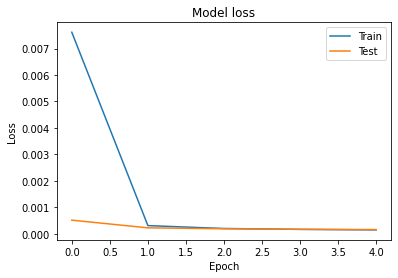

In [24]:
import matplotlib.pyplot as plt
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Question 7
# plot train and test losses
plot_loss(h.history['loss'], h.history['val_loss'])

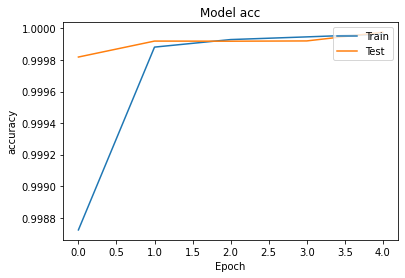

In [30]:
def plot_acc(acc,val_acc):
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model acc')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Question 7
# plot train and test losses
plot_acc(h.history['accuracy'], h.history['val_accuracy'])

In [34]:
df_predict = pd.read_csv("D:/School/cours_5eme/projet/database/Kyoto2016/2015/01/csv_concatenate/concatenate_database_8.csv", sep = ",")
df_predict

,Unnamed: 0,duration_connection,service,source_bytes,destination_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,flag,IDS_detection,malware_detection,ashula_detection,label,source_IP_address,source_port_number,destination_IP_address,destination_port_number,duration
0,0,0.000000,2,0,0,0,0.0,0.0,0.00,0,0,0.0,0.00,0.00,6,0,0,0,-1,15539,47904,624,23,1
1,1,0.000000,2,0,0,0,0.0,0.0,0.00,0,0,0.0,0.00,0.00,6,0,0,0,-1,15539,58974,406,23,1
2,2,0.000000,2,0,0,0,0.0,0.0,0.00,0,0,0.0,0.00,0.00,6,0,0,0,-1,15539,37174,732,23,1
3,3,0.000000,2,0,0,0,0.0,0.0,0.00,0,0,0.0,0.00,0.00,6,0,0,0,-1,5865,40711,641,3389,1
4,4,0.000052,2,0,0,0,0.0,0.0,0.00,0,0,0.0,0.00,0.00,10,3,0,0,-1,3875,8429,566,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723587,305859,0.000000,3,0,0,0,0.0,0.0,0.75,0,1,0.0,0.00,1.00,6,0,0,0,-1,16162,39232,664,80,1
3723588,305860,0.000000,3,0,0,0,0.0,0.0,0.75,0,1,0.0,0.00,1.00,6,0,0,0,-1,16989,4355,311,80,1
3723589,305861,2.983283,3,0,0,0,0.0,0.0,1.00,52,52,0.0,0.92,0.92,6,0,0,0,-1,3198,1357,27,445,1
3723590,305862,0.000000,3,0,0,0,0.0,0.0,1.00,0,0,0.0,0.00,0.00,6,0,0,0,-1,2890,42278,1150,3128,1


In [35]:
# df_predict.loc[df_clean['malware_detection'] != 0] = 1

X_predict = df_predict.drop(['malware_detection'], axis = 1)

y_predict = df_predict[['malware_detection']]

In [36]:
from sklearn.metrics import confusion_matrix
predictions=model.predict(X_predict)
cm = confusion_matrix(y_true=y_predict, y_pred=predictions)
cm

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm